In [1]:
%matplotlib inline

# import statements
import numpy as np
import matplotlib.pyplot as plt #for figures
import pandas as pd


folder = "./With_DTcmb/"
#folder = "./No_DTcmb/"
#folder= "./data/"


350    0.000000e+00
355    0.000000e+00
360    0.000000e+00
365    1.257011e+06
370    2.594695e+06
375    3.495887e+06
380    4.265913e+06
Name: r_ICB, dtype: float64


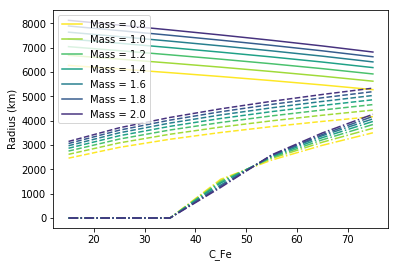

In [44]:
## File data_IS.res : all runs

filename = folder+"data_IS.res"
names = ["M", "C_Fe", "C_FeM", "Psurf", "Rp", "Rc", \
           "RRc", "gs", "rho_c", "rho_m", "Cp_c",\
          "Cp_m", "alpha_c", "alpha_m", "k_m", \
           "shear_m", "Gruneisen", "Ts",  "Tc_adiab", \
         "pc", "DTc", "Tc0", "pc0", "gr_c",
         "r_ICB", "p_ICB", "iter_outer", "iter_inner"] 

data = pd.read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names, index_col=False)

C_FeM = 0.
data = data[data.C_FeM == C_FeM]



   
    
fig, ax = plt.subplots()
Masses = [0.8, 1.,  1.2,  1.4,  1.6, 1.8, 2.]
#Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 

mycm = plt.cm.viridis_r((np.array(Masses)-0.8)/1.4)

for i, M in enumerate(Masses):
    data_Fe = data[data["M"]==M]
    ax.plot(data_Fe["C_Fe"],data_Fe["Rp"]/1e3,  color=mycm[i], label="Mass = {}".format(M))
    ax.plot(data_Fe["C_Fe"],data_Fe["Rc"]/1e3, '--', color=mycm[i], label="")
    ax.plot(data_Fe["C_Fe"],data_Fe["r_ICB"]/1e3, '-.', color=mycm[i], label="")
    
ax.set_ylabel("Radius (km)")
ax.set_xlabel("C_Fe")
ax.legend()
plt.savefig(folder + "Radius_planet_core_inner_core_CFe_{}.pdf".format(C_FeM))



8129253.36278


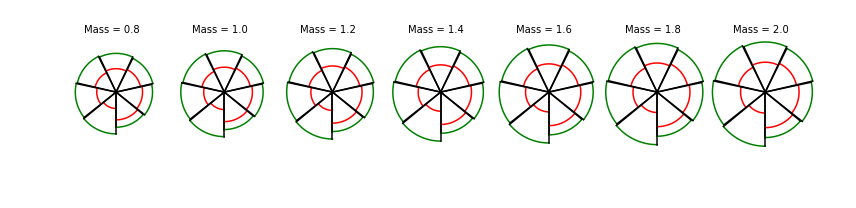

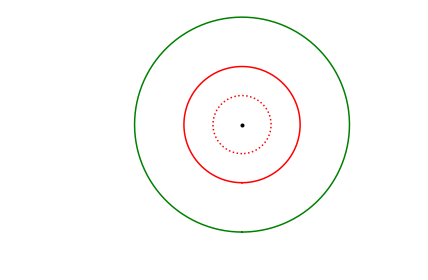

In [6]:


def x(r, theta):
    return r*np.sin(theta)
def y(r, theta):
    return r*np.cos(theta)

n_CFe = 7
n_M = 7
n_t = 50
Masses = [0.8, 1., 1.2, 1.4, 1.6, 1.8, 2.]
CFe = [15., 25., 35., 45., 55., 65., 75.]
theta = np.linspace(-np.pi, np.pi, n_CFe*n_t)
max_R = data["Rp"].max()
print(max_R)

fig, ax = plt.subplots(figsize=[12, 3])

for j, mass in enumerate(Masses): 
    ax.text((j-0.3)*max_R*2, max_R*1.1, "Mass = {}". format(mass))
    for i, Fe in enumerate(CFe):
        th = theta[i*n_t:i*n_t+n_t]
        r = data[(data["M"]==mass) & (data["C_Fe"]==Fe)] 
        Rp = r.iloc[0]["Rp"]
        Rc = r.iloc[0]["Rc"]
        
        ax.plot(Rp*np.sin(th)+2*j*max_R, Rp*np.cos(th), 'green')
        ax.plot(Rc*np.sin(th)+2*j*max_R, Rc*np.cos(th), 'red')
        ax.plot([0, Rp*np.sin(th[0])]+2*j*max_R, [0, Rp*np.cos(th[0])], "black")
        ax.plot([0, Rp*np.sin(th[-1])]+2*j*max_R, [0, Rp*np.cos(th[-1])], "black")
plt.axis('equal')
#ax.set_ylim([-max_R, max_R])
#ax.set_xlim([-max_R, 13*max_R])
plt.axis("off")
plt.tight_layout()
plt.savefig(folder + "radius_poster.pdf")

r = data[(data["M"]==1.) & (data["C_Fe"]==35)] 
Rp = r.iloc[0]["Rp"]
Rc = r.iloc[0]["Rc"]
fig, ax = plt.subplots()
ax.plot(Rp*np.sin(theta), Rp*np.cos(theta), 'green')
ax.plot(Rc*np.sin(theta), Rc*np.cos(theta), 'red')
ax.plot(Rc*np.sin(theta)/2, Rc*np.cos(theta)/2, 'r:')
ax.scatter(0,0, c="k", marker=".")
plt.axis('equal')
#ax.set_ylim([-max_R, max_R])
#ax.set_xlim([-max_R, 13*max_R])
plt.axis("off")
plt.tight_layout()
plt.savefig("singleplanet.pdf")

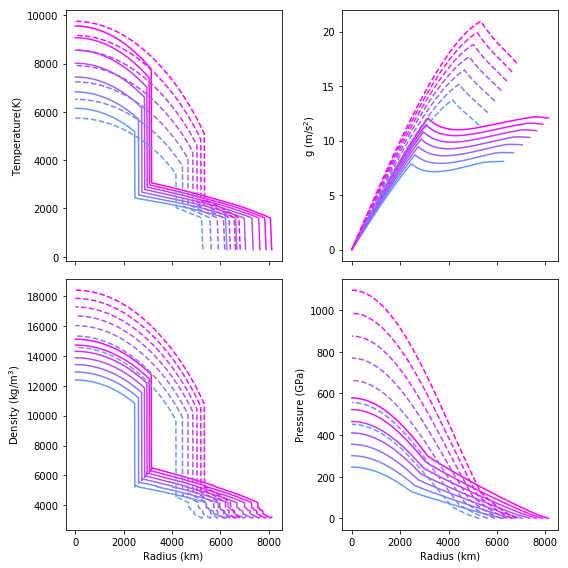

In [7]:
## radial profiles

if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
#print(names[5])

#print(names[5])
#print(folder)


#filename = "/home/marine/ownCloud/Research/Projets/Core_size/October2018/data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res"

fig, ax3 = plt.subplots(2,2, figsize=[8,8], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]    
mycm = plt.cm.cool(np.array(Masses)/2.)

def figure(data, i, symb="-"): 
    ax3[0,0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i])
    ax3[0,1].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i])
    ax3[1,0].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i])
    ax3[1,1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i])

    
files = ["data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_15.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res"]

    
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i)
    
files = ["data_prof_M_ 0.8_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.2_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.4_Fe_75.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.6_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 1.8_Fe_75.0000_FeM_ 0.0000.res",
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]
for i, (M, filename) in enumerate(zip(Masses, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--')


ax3[0,0].set_ylabel("Temperature(K)")
ax3[0,1].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[1,1].set_ylabel("Pressure (GPa)")
ax3[1,0].set_xlabel("Radius (km)")
ax3[1,1].set_xlabel("Radius (km)")
plt.tight_layout()
plt.savefig(folder + "profiles.pdf")


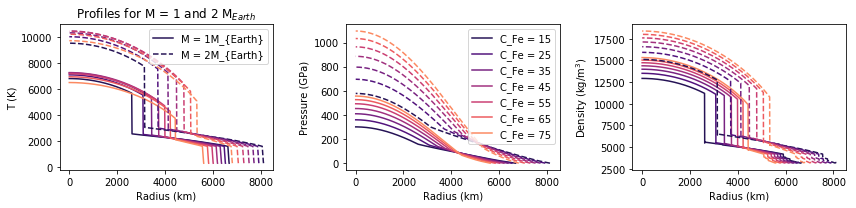

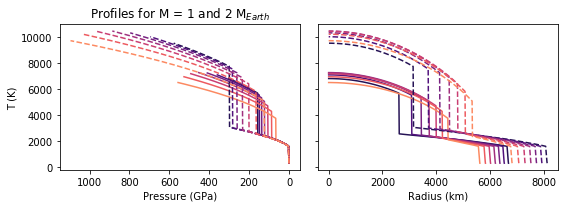

In [8]:
fig, ax = plt.subplots(1,3, sharex=True,figsize=[12,3])

fig2, ax2 = plt.subplots(1,2, sharey=True,figsize=[8,3])

#names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
#         "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
    
files = ["data_prof_M_ 1.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 1.0_Fe_75.0000_FeM_ 0.0000.res"]

CFe = [15, 25, 35, 45, 55, 65, 75]  
mycm = plt.cm.magma(np.array(CFe)/100.)

def figure(data, i, symb="-", label=None, M=1): 
    ax[0].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)
    if M == 1: 
        label = "C_Fe = {}".format(CFe[i])
    else: label == ""
    if label == "M = 2M_{Earth}": label=""
    ax[1].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=label)
    ax[2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=label)
    ax2[0].plot(data["p(GPa)"], data["T(K)"], symb, color=mycm[i], label=label)
    ax2[1].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=label)

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i == 0.:
        label = "M = 1M_{Earth}"
    else: label = ""
    figure(data, i, label=label)
    
    
    
files = ["data_prof_M_ 2.0_Fe_15.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_25.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_35.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_45.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_55.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_65.0000_FeM_ 0.0000.res", 
        "data_prof_M_ 2.0_Fe_75.0000_FeM_ 0.0000.res"]

    
for i, (C, filename) in enumerate(zip(CFe, files)):
    data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    if i == 0.:
        label = "M = 2M_{Earth}"
    else: label = ""
    figure(data, i, "--", label=label, M=2)
    
ax[0].set_ylabel("T (K)")
ax[1].set_ylabel("Pressure (GPa)")
ax[2].set_ylabel("Density (kg/m$^3$)")
ax[2].set_xlabel("Radius (km)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_xlabel("Radius (km)")

ax[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.figure(fig.number)
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig(folder + "profiles_M1_2Earth.pdf")

plt.figure(fig2.number)
ax2[0].set_xlabel("Pressure (GPa)")
ax2[1].set_xlabel("Radius (km)")
ax2[0].set_ylabel("T (K)")
ax2[0].set_title("Profiles for M = 1 and 2 M$_{{Earth}}$")
plt.tight_layout()
ax2[0].invert_xaxis()
plt.savefig(folder + "pressure_Temperature_1_2MEarth.pdf")

./With_DTcmb/data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res


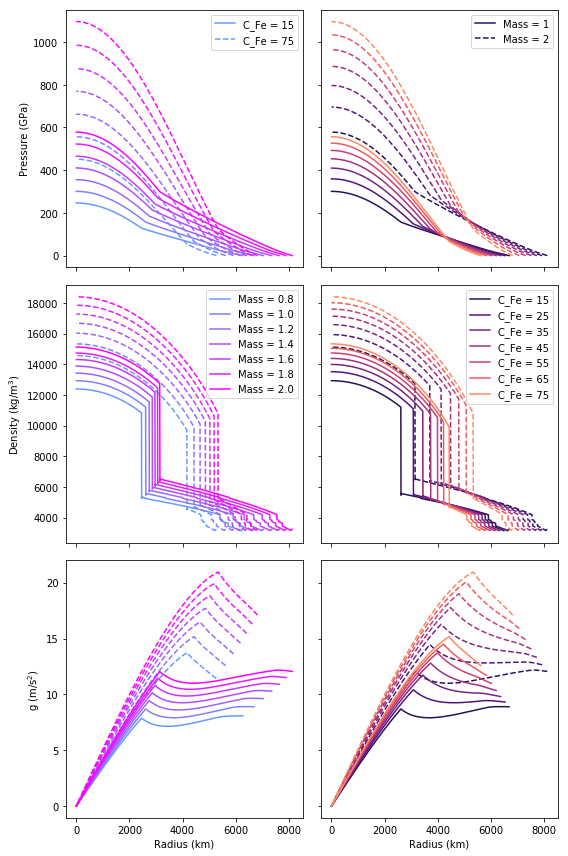

In [9]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(3,2, figsize=[8,12], sharex=True, sharey='row')


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]


def figure(data, i, symb="-", column=0, label="", label2=""): 
    _label = ""
    if column == 0:
        if i == 0:
            _label = label
    elif column == 1:
        if i == 0:
            _label = label
    ax3[0, column].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=_label)
    _label = label2
    ax3[1, column].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=_label)
    ax3[2, column].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i], label="")

def file(M, Fe):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_ 0.0000.res".format(M, Fe)
   
print(file(0.8, 15))
    
mycm = plt.cm.cool(np.array(Masses)/2.)
for i, M in enumerate(Masses):
    filename = file(M, 15)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i, label="C_Fe = 15", label2="Mass = {}".format(M))
    filename = file(M, 75)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', label="C_Fe = 75")

mycm = plt.cm.magma(np.array(Fe)/100.)
for i, C in enumerate(Fe):
    filename = file(1.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, column=1, label="Mass = 1", label2="C_Fe = {}".format(C))
    filename = file(2.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', column=1, label="Mass = 2")

ax3[2,0].set_ylabel("g (m/s$^2$)")
ax3[1,0].set_ylabel("Density (kg/m$^3$)")
ax3[0,0].set_ylabel("Pressure (GPa)")
ax3[2,0].set_xlabel("Radius (km)")
ax3[2,1].set_xlabel("Radius (km)")
plt.tight_layout()
ax3[0,0].legend()
ax3[0,1].legend()
ax3[1,0].legend()
ax3[1,1].legend()
plt.savefig(folder+"profiles_P_rho_g.pdf")

./With_DTcmb/data_prof_M_ 0.8_Fe_15.0000_FeM_ 0.0000.res


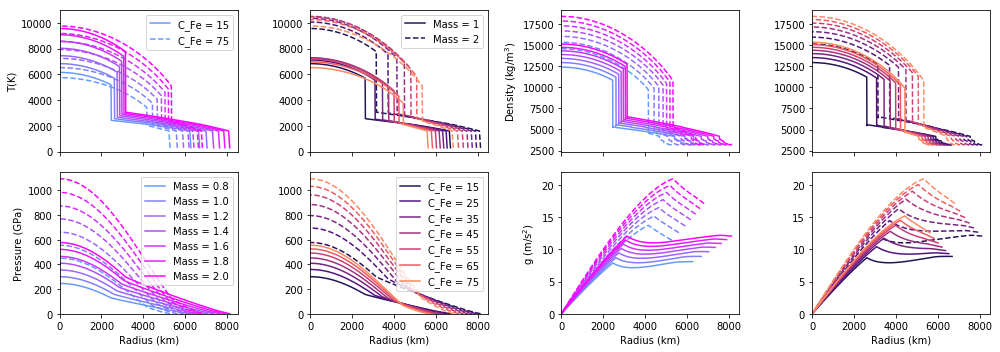

In [11]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax3 = plt.subplots(2, 4, figsize=[14,5], sharex=True)


Masses = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]


def figure(data, i, symb="-", column=0, label="", label2=""): 
    _label = ""
    if column == 0:
        if i == 0:
            _label = label
    elif column == 1:
        if i == 0:
            _label = label
    ax3[0, column].plot(data["r(m)"]/1e3, data["T(K)"], symb, color=mycm[i], label=_label)
    _label = label2
    ax3[1, column].plot(data["r(m)"]/1e3, data["p(GPa)"], symb, color=mycm[i], label=_label)
    ax3[0, column+2].plot(data["r(m)"]/1e3, data["rho(kg/m^3)"], symb, color=mycm[i], label=_label)
    ax3[1, column+2].plot(data["r(m)"]/1e3, data["g(m/s^2)"], symb, color=mycm[i], label="")

def file(M, Fe):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_ 0.0000.res".format(M, Fe)
   
print(file(0.8, 15))
    
mycm = plt.cm.cool(np.array(Masses)/2.)
for i, M in enumerate(Masses):
    filename = file(M, 15)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    #print(data)
    figure(data, i, label="C_Fe = 15", label2="Mass = {}".format(M))
    filename = file(M, 75)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', label="C_Fe = 75")

mycm = plt.cm.magma(np.array(Fe)/100.)
for i, C in enumerate(Fe):
    filename = file(1.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, column=1, label="Mass = 1", label2="C_Fe = {}".format(C))
    filename = file(2.0, C)
    data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
    figure(data, i, '--', column=1, label="Mass = 2")

ax3[0,0].set_ylabel("T(K)")
ax3[1,2].set_ylabel("g (m/s$^2$)")
ax3[0,2].set_ylabel("Density (kg/m$^3$)")
ax3[1,0].set_ylabel("Pressure (GPa)")
ax3[1,0].set_xlabel("Radius (km)")
ax3[1,1].set_xlabel("Radius (km)")
ax3[1,2].set_xlabel("Radius (km)")
ax3[1,3].set_xlabel("Radius (km)")
plt.tight_layout()
ax3[0,0].legend()
ax3[0,1].legend()
ax3[1,0].legend()
ax3[1,1].legend()
ax3[0,0].set_ylim([0, 11000])
ax3[0,1].set_ylim([0, 11000])
ax3[1,0].set_ylim([0,1150])
ax3[1,1].set_ylim([0,1150])
ax3[1,2].set_ylim([0,22])
ax3[1,3].set_ylim([0,22])
ax3[0,0].set_xlim([0, 8500])

plt.tight_layout()
plt.savefig(folder+"profiles_T_P_rho_g.pdf")

## Find pressure and temperature at the CMB



In [123]:
def file(M, Fe, FeM=0):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_{:2d}.0000.res".format(M, Fe, FeM)

def find_CMB(profiles):
    core = profiles[profiles["Material-Parameter"]==8.]
    #print(core)
    index_max = core["r(m)"].idxmax()
    return index_max, core["r(m)"].iloc[0], core["p(GPa)"].iloc[0], core["T(K)"].iloc[0]
    
def find_DT_cmb(profiles):
    core = profiles[profiles["Material-Parameter"]==8.]
    index_max = core["r(m)"].idxmax()
    return profiles["T(K)"].iloc[index]-profiles["T(K)"].iloc[index-1]
    
def center(profiles): 
    return profiles["r(m)"].iloc[-1], profiles["p(GPa)"].iloc[-1], profiles["T(K)"].iloc[-1]

def T_liquidus_mantle(P, FeM=0.):
    """ 5400 * (p/140)^{0.48} / (1 - ln(1-\#Fe_{\rm M}) ) """
    return 5400.*(P/140)**0.48/(1-np.log(1-FeM))

def T_liquidus_core(P, S=0):
    """ T_{\rm melt} = 6500 * (p/340)^{0.515} / (1 - ln(1-X_{\rm S}) ) """
    return 6500.*(P/340)**0.515/(1-np.log(1-S))

def find_rIC(profiles, S=0):
    core = profiles[profiles["Material-Parameter"]==8.]
    Temperature = core["T(K)"].values
    Pressure = core["p(GPa)"].values
    Radius = core["r(m)"].values
    T_liq = T_liquidus_core(Pressure, S)
    index = np.argmin(np.abs(Temperature-T_liq))
    return Radius[index]
    


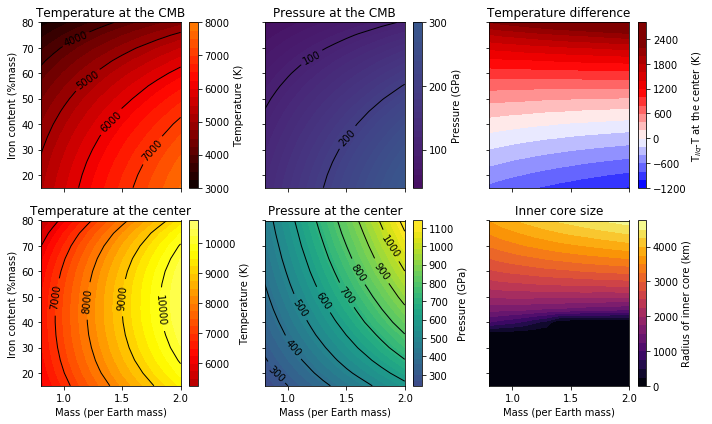

In [76]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 20, 25, 30, 35, 40, 45, 50,  55, 60,  65, 70,  75, 80]

filename = file(1.0, 25)
data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)

#print(data)

M, F = np.meshgrid(Masses, Fe)
Values_T_CMB = np.zeros_like(M)
Values_P_CMB = np.zeros_like(M)
Values_r_CMB = np.zeros_like(M)
Values_T_0 = np.zeros_like(M)
Values_P_0 = np.zeros_like(M)
Values_r_0 = np.zeros_like(M)
rIC = np.zeros_like(M)
rPlanet = np.zeros_like(M)

for i, mass in enumerate(Masses):
    for j, iron in enumerate(Fe):
        filename = file(mass, iron, 0)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
        index, Values_r_CMB[j, i], Values_P_CMB[j, i], Values_T_CMB[j, i] = find_CMB(data)
        Values_r_0[j, i], Values_P_0[j, i], Values_T_0[j, i] = center(data)
        rIC[j, i] = find_rIC(data, S=0)
        rPlanet[j, i] = data["r(m)"].iloc[0]

fig, ax = plt.subplots(2, 3, figsize=[10,6], sharey=True, sharex=True)
#fig2, ax2 = plt.subplots(1, 3, figsize=[10,3], sharey=True, sharex=True)


#sc.set_clim(3000, 11000)


#cb.set_label("Temperature (K)")

ticks_T = np.linspace(0, 12000, 13)
ticks_P = np.linspace(0, 1100, 12)
#plt.savefig(folder+"/T_M_Fe_CMB.pdf")


# fig, ax = plt.subplots()
sc = ax[0,0].contourf(M, F, Values_T_CMB, 20, cmap = plt.cm.hot, vmin=3000, vmax=12000)
sc2 = ax[0,0].contour(M, F, Values_T_CMB, levels=ticks_T, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)

#ax[0,0].set_xlabel("Mass (per Earth mass)")
ax[0,0].set_ylabel("Iron content (%mass)")
cb  = fig.colorbar(sc, ax=ax[0,0], ticks=ticks_T)
cb.set_label("Temperature (K)")

sc = ax[1,0].contourf(M, F, Values_T_0, 20, cmap = plt.cm.hot, vmin=3000, vmax=12000)
sc2 = ax[1,0].contour(M, F, Values_T_0, levels=ticks_T, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)
ax[1,0].set_xlabel("Mass (per Earth mass)")
ax[1,0].set_ylabel("Iron content (%mass)")
cb = plt.colorbar(sc, ax=ax[1,0], ticks=ticks_T)
cb.set_label("Temperature (K)")
#sc.set_clim(3000, 11000)

sc = ax[0,1].contourf(M, F, Values_P_CMB, 30,cmap = plt.cm.viridis, vmin=0, vmax=1100)
sc2 = ax[0,1].contour(M, F, Values_P_CMB, levels=ticks_P, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)
#ax[0,1].set_xlabel("Mass (per Earth mass)")
cb = plt.colorbar(sc, ax=ax[0,1], ticks=ticks_P)
cb.set_label("Pressure (GPa)")

sc = ax[1,1].contourf(M, F, Values_P_0, 30
                , cmap = plt.cm.viridis, vmin=0, vmax=1100)
sc2 = ax[1,1].contour(M, F, Values_P_0, levels=ticks_P, colors=('k',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'k', fontsize=10)
ax[1,1].set_xlabel("Mass (per Earth mass)")
cb = plt.colorbar(sc, ax=ax[1,1], ticks=ticks_P)
cb.set_label("Pressure (GPa)")


sc = ax[1,2].contourf(M, F, rIC/1e3, 20, cmap = plt.cm.inferno)

ax[1,2].set_xlabel("Mass (per Earth mass)")
#ax[0,2].set_ylabel("Iron content (%mass)")
cb  = fig.colorbar(sc, ax=ax[1,2], ticks=np.linspace(0, 4000, 5))
cb.set_label("Radius of inner core (km)")


sc = ax[0,2].contourf(M, F, T_liquidus_core(Values_P_0, S=0)-Values_T_0, 20, cmap = plt.cm.seismic, vmin=-2300, vmax=2300)
#ax[0,0].set_xlabel("Mass (per Earth mass)")
#ax[1,2].set_ylabel("Iron content (%mass)")

cb  = fig.colorbar(sc, ax=ax[0,2])
cb.set_label("T$_{liq}$-T at the center (K)")


ax[0,0].set_title("Temperature at the CMB")
ax[1,0].set_title("Temperature at the center")
ax[0,1].set_title("Pressure at the CMB")
ax[1,1].set_title("Pressure at the center")
ax[0,2].set_title("Temperature difference")
ax[1,2].set_title("Inner core size")


plt.tight_layout()
plt.savefig(folder+"/temperature_CMB_center.pdf")





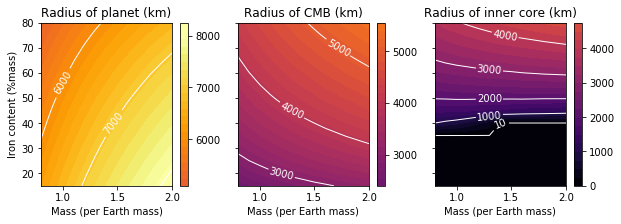

In [83]:
fig, ax = plt.subplots(1, 3, figsize=[10,3], sharey=True, sharex=True)

ticks_r = [10, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]#np.linspace(0, 8000, 9)

sc = ax[2].contourf(M, F, rIC/1e3, 20, cmap = plt.cm.inferno, vmin=0, vmax=8000)
ax[2].set_xlabel("Mass (per Earth mass)")
#ax[0,2].set_ylabel("Iron content (%mass)")
sc2 = ax[2].contour(M, F, rIC/1e3, levels=ticks_r, colors=('w',),linestyles=('-',),linewidths=(1,))
#sc3 = ax[2].contour(M, F, rIC>1, levels=2, colors=('w',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
colorbar  = fig.colorbar(sc, ax=ax[2], ticks=np.linspace(0, 4000, 5))
ax[2].set_title("Radius of inner core (km)")

sc = ax[1].contourf(M, F, Values_r_CMB/1e3, 20, cmap = plt.cm.inferno, vmin=0, vmax=8000)
sc2 = ax[1].contour(M, F, Values_r_CMB/1e3, levels=ticks_r, colors=('w',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)

ax[1].set_xlabel("Mass (per Earth mass)")
#ax[0,2].set_ylabel("Iron content (%mass)")
colorbar  = fig.colorbar(sc, ax=ax[1], ticks=np.linspace(2000, 6000, 5))
ax[1].set_title("Radius of CMB (km)")

sc3 = ax[0].contourf(M, F, rPlanet/1e3, 20, cmap = plt.cm.inferno, vmin=0, vmax=8000)
ax[0].set_xlabel("Mass (per Earth mass)")
#ax[0,2].set_ylabel("Iron content (%mass)")
sc = ax[0].contourf(M, F, rPlanet/1e3, 20, cmap = plt.cm.inferno, vmin=0, vmax=8000)
sc2 = ax[0].contour(M, F, rPlanet/1e3, levels=ticks_r, colors=('w',),linestyles=('-',),linewidths=(1,))
plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
colorbar  = fig.colorbar(sc3, ax=ax[0], ticks=np.linspace(6000, 10000, 5))
ax[0].set_title("Radius of planet (km)")

ax[0].set_ylabel("Iron content (%mass)")

plt.savefig("radius_planet_CMB_IC_FeM_0.pdf")

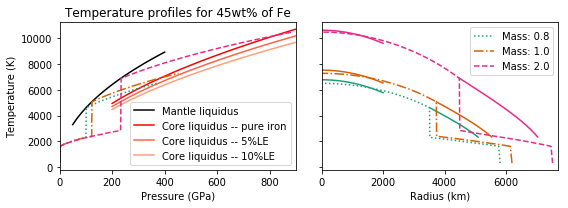

In [78]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=[8, 3])

def file(M, Fe, FeM=0):
    return folder+"data_prof_M_ {:.1f}_Fe_{:.0f}.0000_FeM_{:2d}.0000.res".format(M, Fe, FeM)

   
file_08 = file(0.8, 35, 0)
file_1 = file(1.0, 35, 0)
file_2 = file(2.0, 35, 0)

mark = [":", "-.", "--"]

masses = np.array([0.8, 1.0, 2.0])
cm = plt.cm.Dark2((masses-0.4)/4)




P = np.linspace(50, 400, 30)
ax[0].plot(P, T_liquidus_mantle(P), "k", label="Mantle liquidus")

P = np.linspace(200, 900, 30)
ax[0].plot(P, T_liquidus_core(P), "r", label="Core liquidus -- pure iron")
ax[0].plot(P, T_liquidus_core(P, 0.05), "tomato", label="Core liquidus -- 5%LE")
ax[0].plot(P, T_liquidus_core(P, 0.10), "lightsalmon", label="Core liquidus -- 10%LE")

for i, mass in enumerate(masses):
    data = pd.read_csv(file(mass, 45, 0), skipinitialspace=True, sep=" ", names=names, index_col=False)
    ax[0].plot(data["p(GPa)"], data["T(K)"], mark[i], color=cm[i], label= "")
    ax[1].plot(data["r(m)"]/1e3, data["T(K)"], mark[i], color=cm[i], label="Mass: {}".format(mass))

    #print(data)
    deep_mantle = data[(data["Material-Parameter"] == 7.) | (data["Material-Parameter"] == 6.)]
    core = data[(data["r(m)"] <2e6)]
    #print(deep_mantle)
    ax[1].plot(deep_mantle["r(m)"]/1e3, T_liquidus_mantle(deep_mantle["p(GPa)"]), color=cm[i], label="")
    ax[1].plot(core["r(m)"]/1e3, T_liquidus_core(core["p(GPa)"]), color=cm[i], label= "")
    
ax[0].set_xlabel("Pressure (GPa)")
ax[1].set_xlabel("Radius (km)")
ax[0].set_ylabel("Temperature (K)")
ax[0].legend(fontsize="medium")
ax[1].legend(fontsize="medium")
ax[0].set_xlim([0, 900])
ax[1].set_xlim([0, 7700])

ax[0].set_title("Temperature profiles for 45wt% of Fe")

plt.tight_layout()
plt.savefig(folder+"/temperature_profiles.pdf")

In [ ]:
if folder == "./With_DTcmb/" or folder == "./No_DTcmb/":
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]
else: 
    names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 25, 35, 45, 55, 65, 75]

M, F = np.meshgrid(Masses, Fe)
Values_DT_0 = np.zeros_like(M)
Values_DT_5 = np.zeros_like(M)




for i, mass in enumerate(Masses):
    for j, iron in enumerate(Fe):
        filename = file(mass, iron, 0)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
        pressure = data["p(GPa)"].iloc[-1] 
        T_center = data["T(K)"].iloc[-1]
        DT = T_liquidus_core(pressure, 0.05) -T_center
        Values_DT_5[j, i] = -DT
        DT = T_liquidus_core(pressure, 0) -T_center
        Values_DT_0[j, i] = -DT

        
        
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=[6, 3])
maximum_0 = np.amax(np.abs(Values_DT_0))
maximum_5 = np.amax(np.abs(Values_DT_5))
maximum = max(maximum_0, maximum_5)
sc = ax[0].contourf(M, F, Values_DT_0, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
sc2 = ax[1].contourf(M, F, Values_DT_5, 20, cmap = plt.cm.bwr, vmin=-maximum, vmax =maximum)
#ax.contour(M, F, np.sign(Values_DT), 10)

ax[0].set_xlabel("Mass (per Earth mass)")
ax[1].set_xlabel("Mass (per Earth mass)")
ax[0].set_ylabel("Iron content (%mass)")
cb = plt.colorbar(sc, ax = ax[0])
cb = plt.colorbar(sc2, ax=ax[1])
cb.set_label("T$_{center}$-T$_{melt}$  (K)")
ax[0].set_title("Pure iron")
ax[1].set_title("Iron + 5% impurities")
plt.tight_layout()

plt.savefig(folder + "/Delta_T.pdf")

### Temporal variations

In [ ]:
### temporal variations

folder= "./data/"
names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
#data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names)

#data.plot("t(yr)", "qc(W/m²)")

M = [8, 10, 12, 14, 16, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(2, 3,sharey='row', figsize=[12,8])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = folder+"qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass < 12:
            if mass == 8: symb = "--"
            else: symb = "-"
            ax[0,0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,0].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        elif mass < 16:
            if mass == 12: symb = "--"
            else: symb = "-"
            ax[0,1].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])
        else:
            if mass == 16: symb = "--"
            else: symb = "-"
            ax[0,2].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
            ax[1,2].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0,0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1,0].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[1,1].set_xlabel("Age (years)")
ax[1,2].set_xlabel("Age (years)")
ax[1,0].set_xlabel("Age (years)")

plt.savefig(folder+"time_evolution_onlyCFeM0.pdf")

In [ ]:
# temporal variations

filename = "qc_T_M10_Fe45_FeM0.txt"
names = ["t(yr)", "qc(W/m²)", "TCMB(K)"] 
#data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names)

#data.plot("t(yr)", "qc(W/m²)")


files_10 = ["qc_T_M10_Fe15_FeM0.txt",
         "qc_T_M1_Fe25_FeM0.txt",]

M = [10, 20]
Fe = [15, 25, 35, 45, 55, 65, 75]
fig, ax = plt.subplots(1, 2, figsize=[8, 3])

cmap = plt.cm.plasma(np.array(Fe)/100)

for mass in M:
    for i, CFe in enumerate(Fe):
        filename = "qc_T_M{:02d}_Fe{:02d}_FeM00.txt".format(mass,CFe)
        data = pd.read_csv(folder+filename, skipinitialspace=True, sep=" ", names=names, skiprows=[0])
        if mass == 10: 
            symb = "-"
            label_q = "C_Fe = {}".format(CFe)
        else: 
            symb = "--"
            label_q = ""
        ax[0].plot(data["t(yr)"], data["qc(W/m²)"], symb, color=cmap[i])
        ax[1].plot(data["t(yr)"], data["TCMB(K)"], symb, color=cmap[i])

ax[0].set_ylabel("Heat flux at CMB (W/m$²$)")
ax[1].set_ylabel("Temperature at CMB (mantle side) (K)")

ax[0].set_xlabel("Age (years)")
ax[1].set_xlabel("Age (years)")
ax[0].set_xlim([0, 5e9])
ax[1].set_xlim([0, 5e9])

plt.tight_layout()
plt.savefig(folder + "time_evolution_onlyCFeM0_mass_1&2.pdf")

# Exploring different FeM values

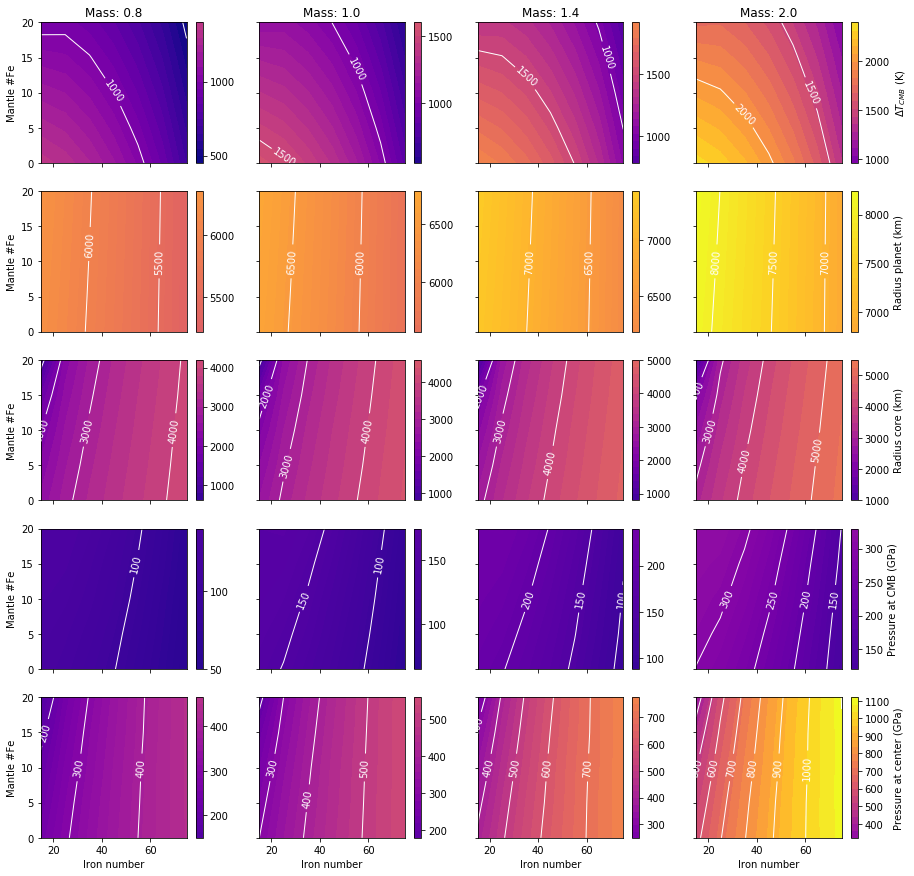

In [144]:
FeM_n = [0, 5, 10, 15, 20]
Fe_n = [15, 25, 35, 45, 55, 65, 75]
Masses = [0.8, 1.0, 1.4, 2.]

#Masses = [0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.] 
Fe = [15, 20, 25, 30, 35, 40, 45, 50,  55, 60,  65, 70,  75, 80]

Fe, FeM = np.meshgrid(Fe_n, FeM_n)
Values_P_CMB = np.zeros_like(FeM)
Values_r_CMB = np.zeros_like(FeM)
Values_P_0 = np.zeros_like(FeM)
DTcmb = np.zeros_like(FeM)
rPlanet = np.zeros_like(FeM)

names = ["g(m/s^2)", "p(GPa)", "rho(kg/m^3)","r(m)", "T(K)", "oups", "Cp(J/kgK)", "alpha(10^-5 1/s)", "Gruneisen(1)", \
             "KT(GPa)", "KS(GPa)", "G(GPa)", "ElCond (Siemens)", "Material-Parameter" ]

cmap = plt.cm.plasma


fig, ax = plt.subplots(5, len(Masses), figsize=[15,15], sharex=True, sharey=True)

for i, mass in enumerate(Masses):
    for i_fe, iron in enumerate(Fe_n):
        for i_fem, fem in enumerate(FeM_n):
            filename = file(mass, iron, fem)
            data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
            index, Values_r_CMB[i_fem, i_fe], Values_P_CMB[i_fem, i_fe], _ = find_CMB(data)
            DTcmb[i_fem, i_fe] = find_DT_cmb(data)
            __, Values_P_0[i_fem, i_fe], _ = center(data)
            rPlanet[i_fem, i_fe] = data["r(m)"].iloc[0]
    
    ax[0, i].set_title("Mass: {}".format(mass))
    
    # DT cmb
    sc = ax[0, i].contourf(Fe, FeM, DTcmb, 20, cmap = cmap, vmin=500, vmax=2500)
    ticks = np.linspace(500, 2500, 5)
    sc2 = ax[0, i].contour(Fe, FeM, DTcmb, levels=ticks, colors=('w',),linestyles=('-',),linewidths=(1,))
    plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
    colorbar  = fig.colorbar(sc, ax=ax[0, i], ticks=ticks)
    if i == len(Masses)-1:
        colorbar.set_label("$\Delta T_{CMB}$ (K)")
    
    # Planet radius
    sc = ax[1, i].contourf(Fe, FeM, rPlanet/1e3, 20, cmap = cmap, vmin=1000, vmax=8200)
    ticks = np.linspace(5000, 9000, 9)
    sc2 = ax[1, i].contour(Fe, FeM, rPlanet/1e3, levels=ticks, colors=('w',),linestyles=('-',),linewidths=(1,))
    plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
    colorbar  = fig.colorbar(sc, ax=ax[1, i], ticks=ticks)
    if i == len(Masses)-1:
        colorbar.set_label("Radius planet (km)")
    
    # Core radius
    sc = ax[2, i].contourf(Fe, FeM, Values_r_CMB/1e3, 20, cmap = cmap, vmin=0, vmax=8200)
    ticks = np.linspace(0, 6000, 7)
    sc2 = ax[2, i].contour(Fe, FeM, Values_r_CMB/1e3, levels=ticks, colors=('w',),linestyles=('-',),linewidths=(1,))
    plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
    colorbar  = fig.colorbar(sc, ax=ax[2, i], ticks=ticks)
    if i == len(Masses)-1:
        colorbar.set_label("Radius core (km)")
    
    # PCmb
    sc = ax[3, i].contourf(Fe, FeM, Values_P_CMB, 20, cmap = cmap, vmin=0, vmax=1100)
    ticks = np.linspace(0, 400, 9)
    sc2 = ax[3, i].contour(Fe, FeM, Values_P_CMB, levels=ticks, colors=('w',),linestyles=('-',),linewidths=(1,))
    plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
    colorbar  = fig.colorbar(sc, ax=ax[3, i], ticks=ticks)
    if i == len(Masses)-1:
        colorbar.set_label("Pressure at CMB (GPa)")
    
    # PCenter
    sc = ax[4, i].contourf(Fe, FeM, Values_P_0, 20, cmap = cmap, vmin=0, vmax=1100)
    ticks = np.linspace(0, 1100, 12)
    sc2 = ax[4, i].contour(Fe, FeM, Values_P_0, levels=ticks, colors=('w',),linestyles=('-',),linewidths=(1,))
    plt.clabel(sc2, fmt = '%2.1d', colors = 'w', fontsize=10)
    colorbar  = fig.colorbar(sc, ax=ax[4, i], ticks=ticks)
    if i == len(Masses)-1:
        colorbar.set_label("Pressure at center (GPa)")
    
for i in range(5):
    ax[i, 0].set_ylabel("Mantle #Fe")
    
for j, mass in enumerate(Masses):
    ax[-1, j].set_xlabel("Iron number")

plt.savefig("Fig4.pdf")

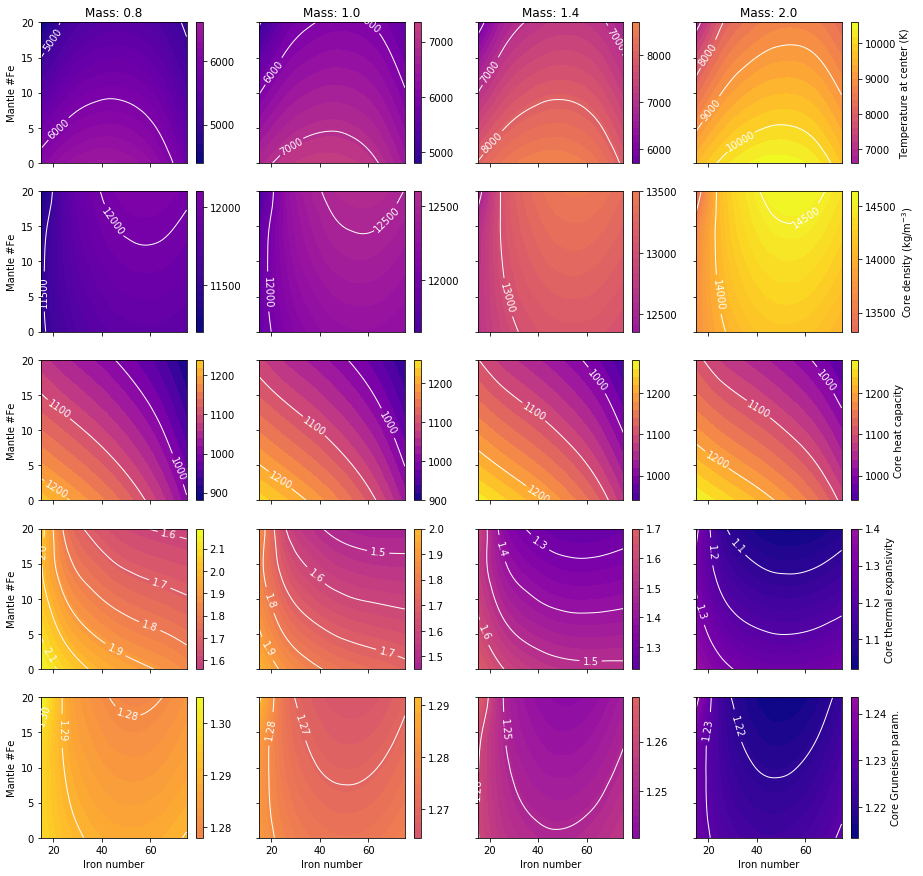

In [168]:
from scipy.interpolate import griddata

filename = folder+"data_IS.res"
names = ["M", "C_Fe", "C_FeM", "Psurf", "Rp", "Rc", \
           "RRc", "gs", "rho_c", "rho_m", "Cp_c",\
          "Cp_m", "alpha_c", "alpha_m", "k_m", \
           "shear_m", "Gruneisen", "Ts",  "Tc_adiab", \
         "pc", "DTc", "Tc0", "pc0", "gr_c",
         "r_ICB", "p_ICB", "iter_outer", "iter_inner"] 

data = pd.read_csv(filename, skipinitialspace=True, delim_whitespace=True, names=names, index_col=False)

cmap = plt.cm.plasma
Masses = [0.8, 1.0, 1.4, 2.]
param = ["Tc0", "rho_c", "Cp_c", "alpha_c", "gr_c"]

fig, ax = plt.subplots(len(param), len(Masses), figsize=[15,15], sharex=True, sharey=True)
#fig2, ax2 = plt.subplots(len(param), len(Masses), figsize=[15,15], sharex=True, sharey=True)

ticks = {"Tc0": np.linspace(3000, 11000, 9), 
         "rho_c": np.linspace(11000, 15000, 9),
         "Cp_c":np.linspace(900, 1300, 5), 
         "alpha_c": np.linspace(1, 2.2, 13), 
         "gr_c": np.linspace(1.21, 1.31, 11)}

Names = {"Tc0": "Temperature at center (K)", 
         "rho_c": "Core density (kg/m$^{-3}$)",
         "Cp_c":"Core heat capacity", 
         "alpha_c": "Core thermal expansivity", 
         "gr_c": "Core Gruneisen param."}

Format = {"Tc0": "%d", 
         "rho_c": "%d",
         "Cp_c":"%d", 
         "alpha_c": "%.1f", 
         "gr_c": "%.2f"}

for i, p in enumerate(param):
    for j, m in enumerate(Masses):
        
        valmin = data[p].min()
        valmax = data[p].max()
        
        values_to_use = data[data["M"]==m]
        FeM = values_to_use["C_FeM"].values
        Fe = values_to_use["C_Fe"].values
        values = values_to_use[p].values
        
        
        #sc = ax[i, j].tricontourf(Fe, FeM, values, 30)
        #colorbar  = fig.colorbar(sc, ax=ax[i, j])
        
        grid_x, grid_y = np.mgrid[15:75:50j, 0:20:50j]
        grid_z = griddata((Fe, FeM), values, (grid_x, grid_y), method='cubic')
        sc = ax[i, j].contourf(grid_x, grid_y, grid_z, 20, cmap = cmap, vmin=valmin, vmax=valmax)
        sc2 = ax[i, j].contour(grid_x, grid_y, grid_z, levels=ticks[p], colors=('w',),linestyles=('-',),linewidths=(1,))
        plt.clabel(sc2, fmt = Format[p], colors = 'w', fontsize=10)
        colorbar  = fig.colorbar(sc, ax=ax[i, j], ticks=ticks[p])
        if j == len(Masses)-1:
            colorbar.set_label(Names[p])
        
for i, p in enumerate(param):
    ax[i, 0].set_ylabel("Mantle #Fe")
    
for j, mass in enumerate(Masses):
    ax[-1, j].set_xlabel("Iron number")
    ax[0, j].set_title("Mass: {}".format(mass))
    
plt.savefig("Fig5.pdf")